In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv(r"C:\Users\angel\Downloads\Task 19- COVID-19 Symptoms Checker (4).csv")

In [3]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [4]:
df.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
131058,1,1,1,1,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,France
150299,1,1,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,France
305994,0,0,0,0,1,0,1,1,1,0,...,1,0,0,0,0,1,0,0,1,Other
207945,0,1,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,Germany
193876,0,0,0,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,Germany


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [6]:
df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.drop(["Country"],axis=1,inplace=True)

In [8]:
df.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
dtype: int64

In [9]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
316795     True
316796     True
316797     True
316798     True
316799     True
Length: 316800, dtype: bool

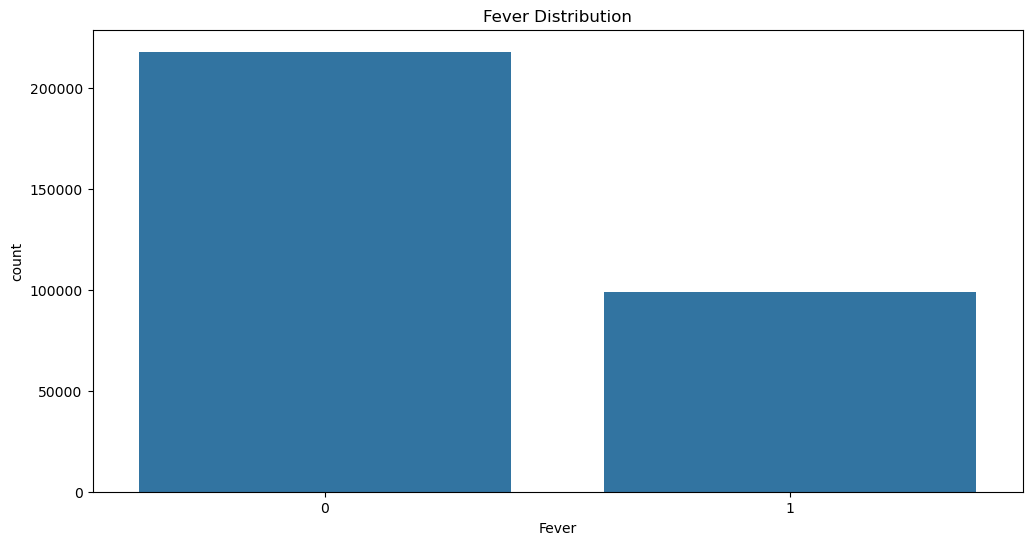

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Symptom distribution
plt.figure(figsize=(12,6))
sns.countplot(x='Fever', data=df)
plt.title('Fever Distribution')
plt.show()

# Other symptom distributions can be plotted similarly


Model Development
Develop a machine learning model to predict COVID-19 severity or recommendation based on symptoms and demographic information.

Step 3.1: Feature Engineering

Create features from the symptom data and demographic information.

python

In [11]:
# Select features and target variable
features = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing', 'Sore-Throat',
            'Pains', 'Nasal-Congestion', 'Runny-Nose', 'Diarrhea', 'Gender_Male', 
            'Gender_Transgender', 'Contact_Yes']
target = 'Contact_Yes'

X = df[features]
y = df[target]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Print evaluation metrics
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42294
           1       1.00      1.00      1.00     21066

    accuracy                           1.00     63360
   macro avg       1.00      1.00      1.00     63360
weighted avg       1.00      1.00      1.00     63360

Accuracy: 1.0


<Axes: >

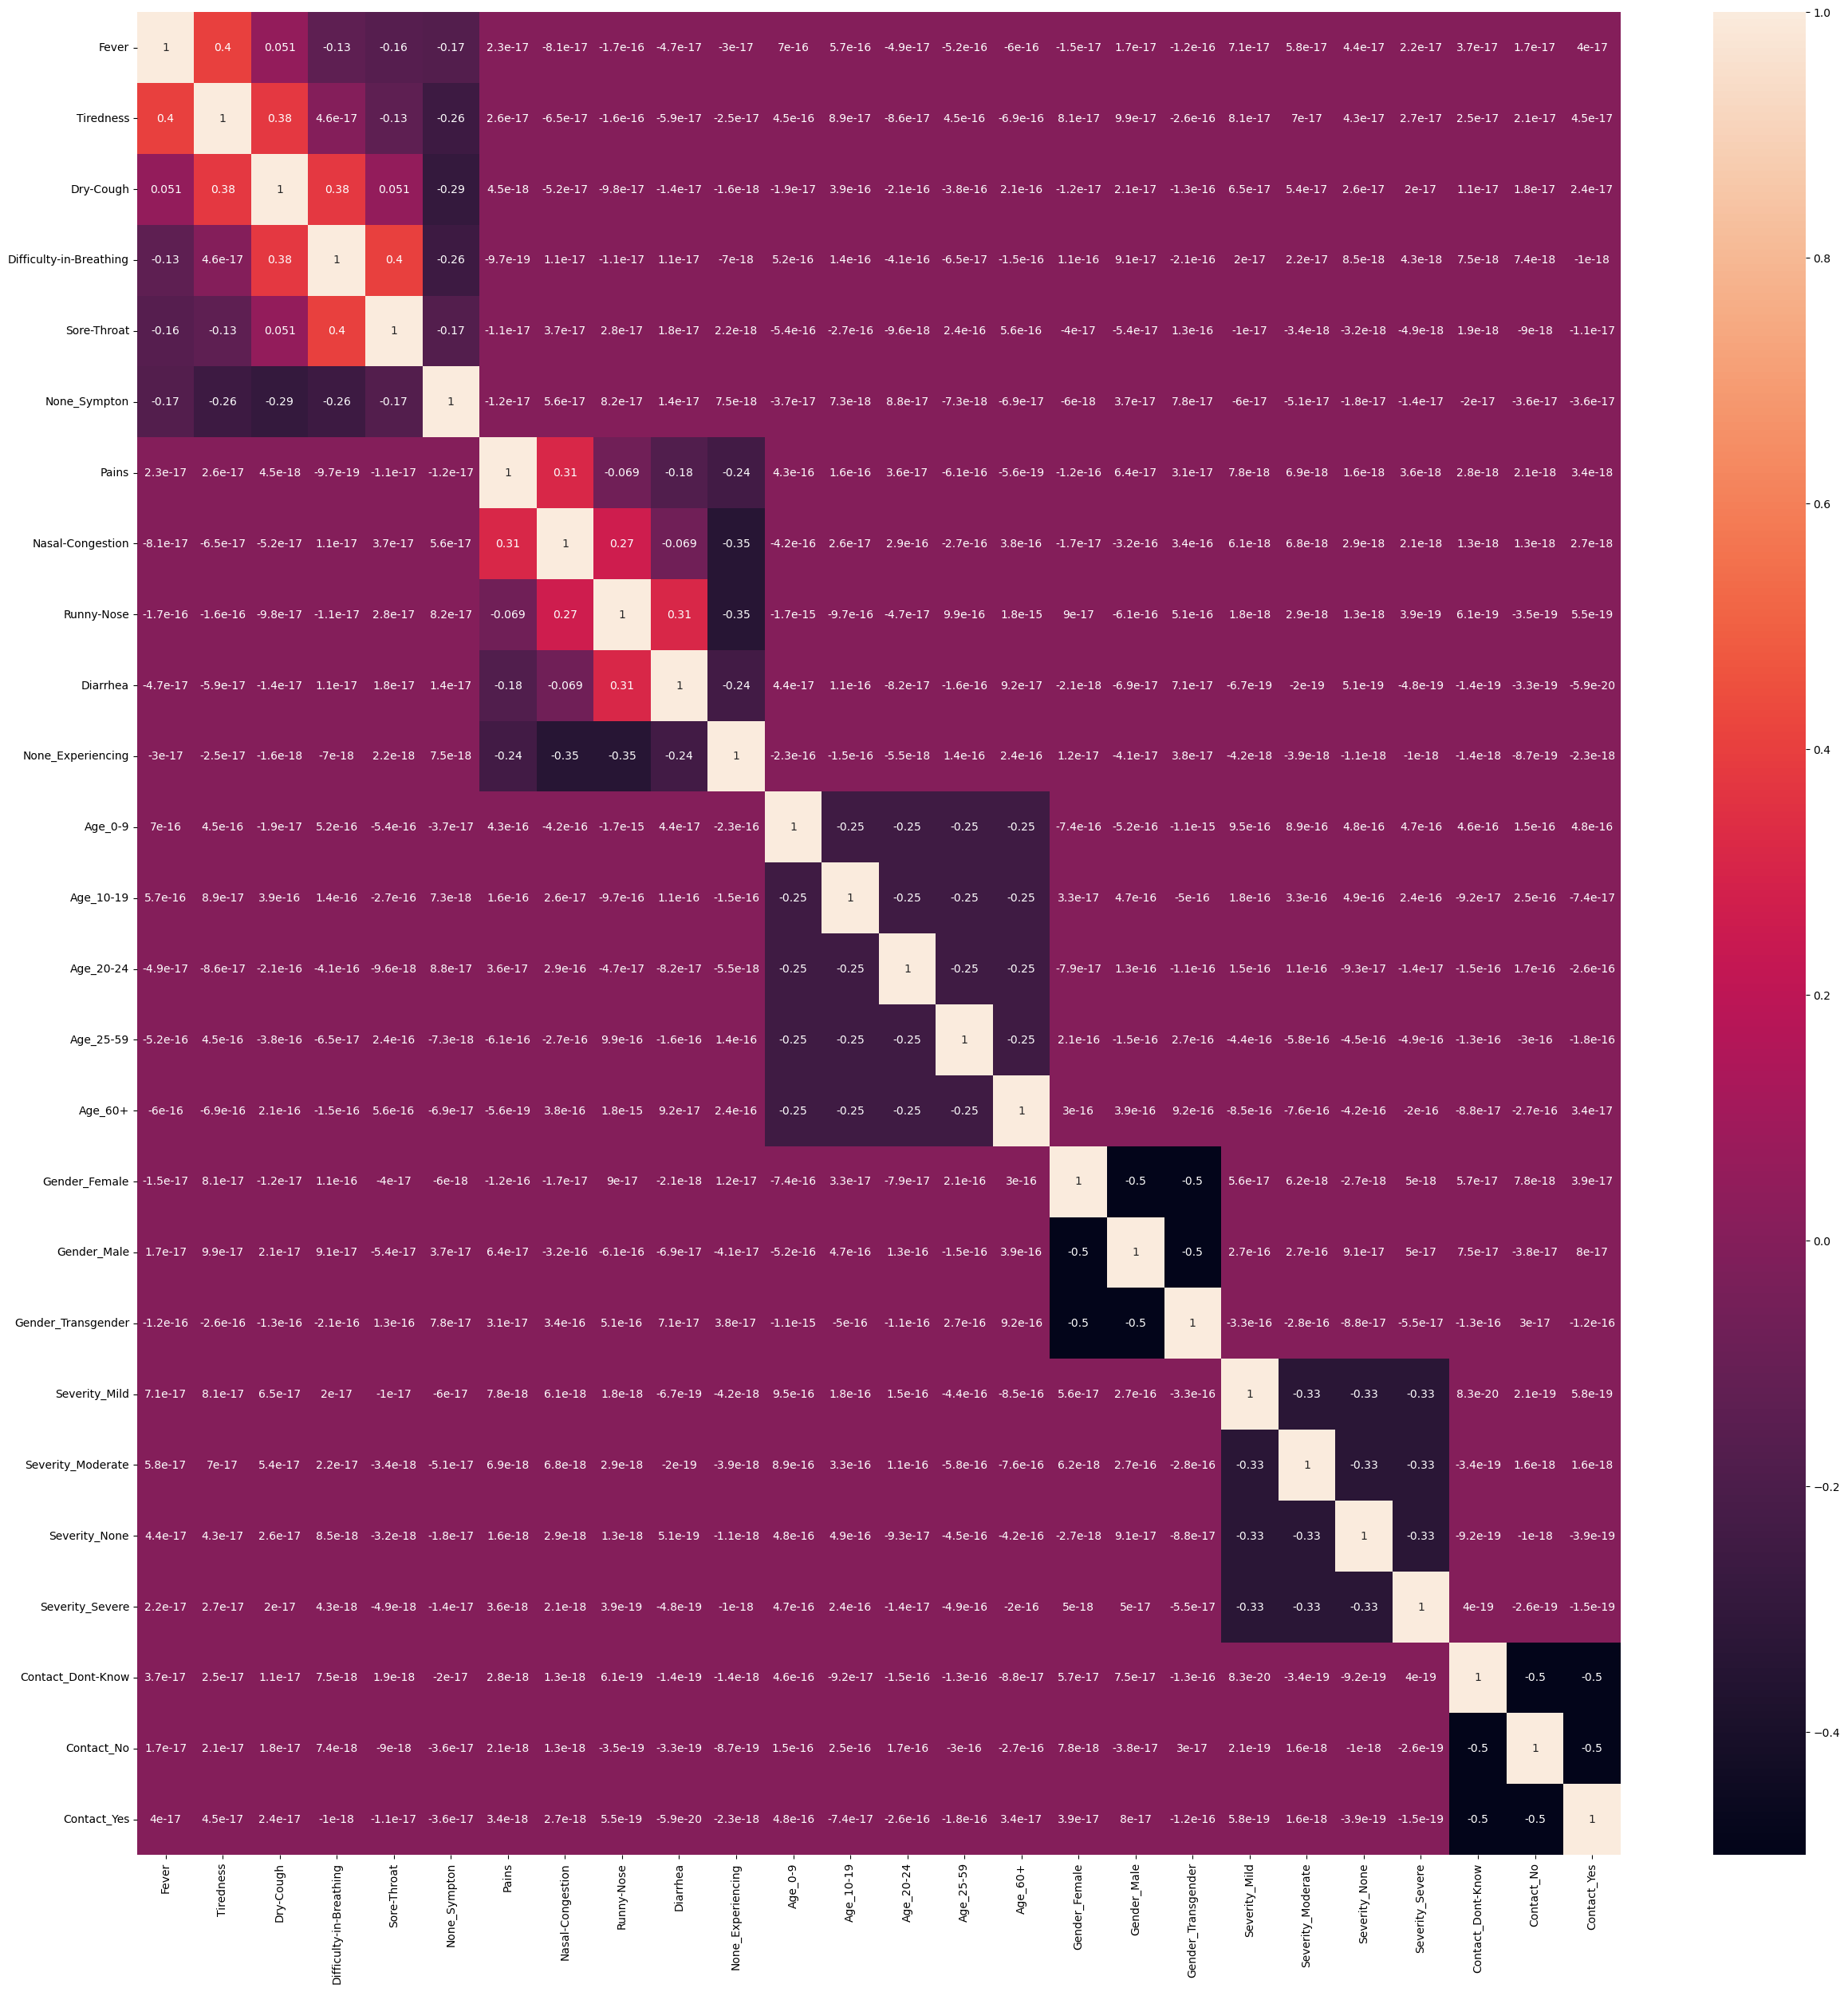

In [15]:
f,ax=plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)

# Elbow Method
Used to find optimal number of clusters.

In [16]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [17]:
#To get the Within Cluster Sum of Squares(WCSS) for each cluster count to find the optimal K value(i.e cluster count).
scores=[]
for i in range(1,20):
    corona_means=KMeans(n_clusters=i)
    corona_means.fit(df_scaled)
    scores.append(corona_means.inertia_)

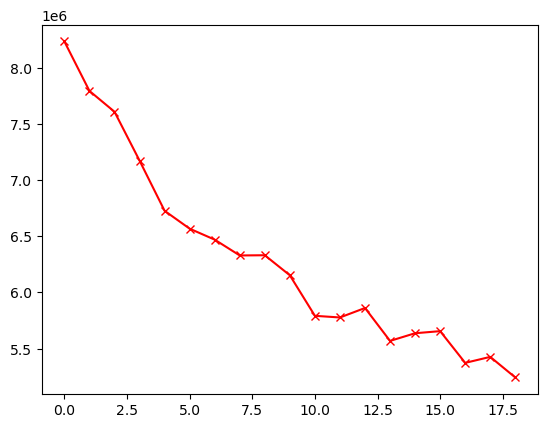

In [18]:
plt.plot(scores,"-rx")

# At point 7 ,the graph looks like a elbow. So we choose this as our K value.

# KMeans Clustering

In [19]:
corona_means=KMeans(n_clusters=7)
corona_means.fit(df_scaled)

KMeans(n_clusters=7)

In [20]:
labels=corona_means.labels_

In [21]:
#Creating a Dataframe with cluster centres(The example which is taken as center for each cluster)-If you are not familiar ,learn about k-means through the link given at last.
df_m=pd.DataFrame(corona_means.cluster_centers_,columns=df.columns)
df_m

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.305621e-16,-3.226137e-16,4.304282e-16,5.378203e-17,...,-4.716233e-15,7.877342e-15,7.875362e-15,-4.696019e-20,-1.565340e-20,-7.398356e-17,-1.565340e-20,7.401487e-17,7.401487e-17,7.401487e-17
1,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.305621e-16,-3.226137e-16,4.304282e-16,5.378203e-17,...,-4.716233e-15,7.877342e-15,7.875362e-15,-4.696019e-20,-1.565340e-20,-7.398356e-17,-1.565340e-20,7.401487e-17,7.401487e-17,7.401487e-17
2,-0.674200,-0.714286,0.017998,0.428571,0.558623,-0.258199,4.304767e-16,-3.222036e-16,4.301890e-16,5.373077e-17,...,6.503712e-15,-1.246861e-15,-1.253079e-15,-9.822590e-20,-3.274197e-20,-7.394938e-17,-3.274197e-20,7.401487e-17,7.401487e-17,7.401487e-17
3,-0.674200,-1.000000,-1.133893,-1.000000,-0.674200,3.872983,4.304126e-16,-3.218960e-16,4.300096e-16,5.369232e-17,...,1.329361e-15,-2.159075e-16,2.135820e-16,-1.366752e-19,-4.555839e-20,-7.392375e-17,-4.555839e-20,7.401487e-17,7.401487e-17,7.401487e-17
4,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.305621e-16,-3.226137e-16,4.304282e-16,5.378203e-17,...,-4.716233e-15,7.877342e-15,7.875362e-15,-4.696019e-20,-1.565340e-20,-7.398356e-17,-1.565340e-20,7.401487e-17,7.401487e-17,7.401487e-17
5,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,2.324265e-16,-1.507198e-16,3.776459e-16,6.707481e-17,...,-3.618122e-15,7.236896e-15,9.030054e-15,-2.453144e-20,1.425160e-20,-5.574151e-17,-4.439023e-21,7.401487e-17,7.401487e-17,7.401487e-17
6,0.674200,0.750000,0.125988,-0.250000,-0.404520,-0.258199,4.150909e-16,-1.811107e-16,4.069752e-16,5.383040e-17,...,8.641940e-15,-1.501913e-16,3.164824e-15,-5.817457e-20,-1.471887e-20,-7.392936e-17,-2.172785e-20,7.401487e-17,7.401487e-17,7.401487e-17


# It's clear from the above table that the people at cluster 4 are not affected with corona while other clusters do affected with corona. The other clusters can also be classified. Have a close look you can find difference between the clusters.

In [22]:
df_cluster=pd.concat([df,pd.DataFrame({"Cluster":labels})],axis=1)
df_cluster.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Cluster
139692,1,1,1,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,5
302954,0,1,1,0,0,0,1,1,1,0,...,0,1,1,0,0,0,1,0,0,5
134654,0,0,0,1,1,0,1,1,1,0,...,1,0,1,0,0,0,1,0,0,1
287987,0,1,1,1,1,0,0,0,1,1,...,0,0,0,0,1,0,1,0,0,2
258017,1,1,1,0,0,0,0,0,1,1,...,0,1,0,1,0,0,1,0,0,6


Principal Component Analysis (PCA)
Used to perform dimentionality reduction to have a better view of clusters of examples.

In [23]:
df_pca=PCA(n_components=3)
df_comp=df_pca.fit_transform(df_scaled)

In [24]:
df_comp=pd.DataFrame(df_comp,columns=['pca1','pca2','pca3'])
df_comp.head()

,pca1,pca2,pca3
0,2.097959,-1.813713,1.789373e-15
1,2.097959,-1.813713,1.739407e-15
2,2.097959,-1.813713,1.676526e-15
3,2.097959,-1.813713,1.803525e-15
4,2.097959,-1.813713,1.753559e-15


In [25]:
df_comp=pd.concat([df_comp,pd.DataFrame({"Cluster":labels})],axis=1)
df_comp.sample(5)

,pca1,pca2,pca3,Cluster
200077,-0.541282,0.309264,-4.475764e-15,1
95654,-1.168397,-0.247459,1.156788e+00,6
232298,-3.690157,0.762074,4.897313e-15,3
17606,1.636138,-1.256991,-1.156788e+00,5
214120,1.174317,-1.256991,-6.066336e-15,0


C:\Users\angel\anaconda4\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


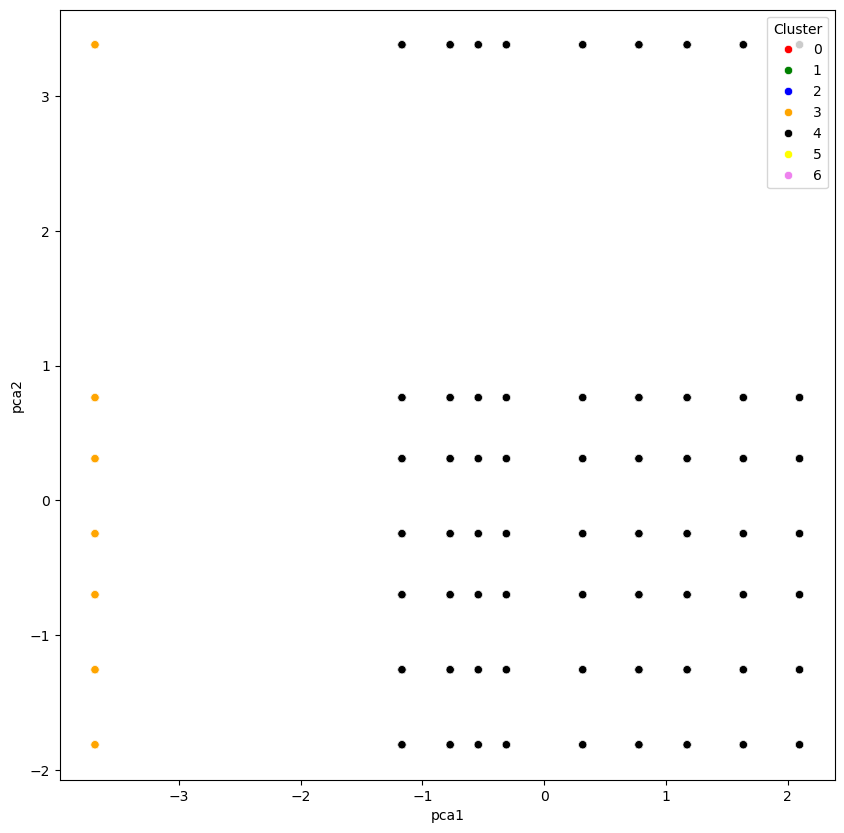

In [26]:
#Plotting the 2d-plot.
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue="Cluster",data=df_comp ,palette=['red','green','blue','orange','black','yellow','violet'])
plt.show()

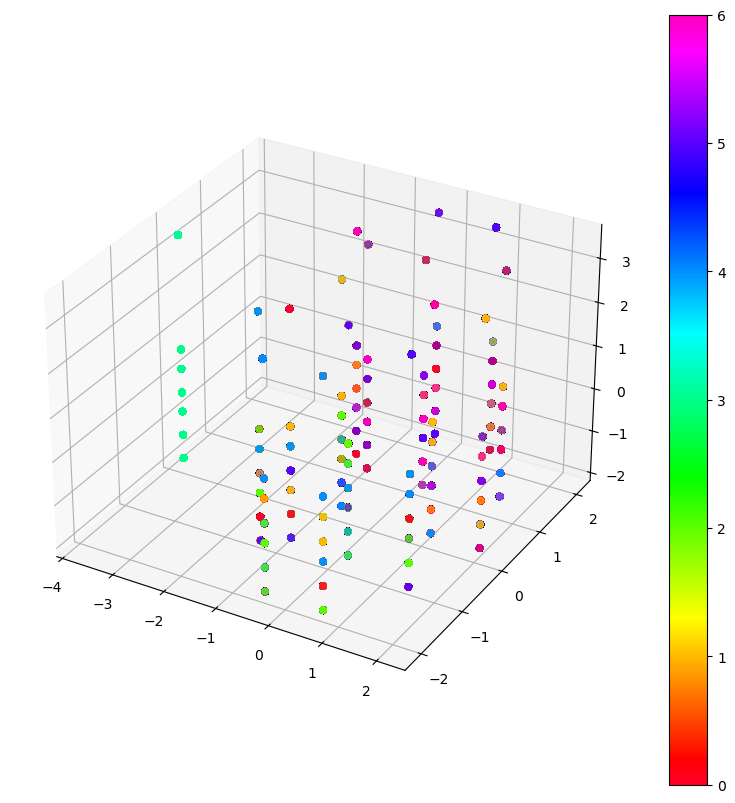

In [27]:
#Plotting the 3d-plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(xs=df_comp['pca1'],ys=df_comp['pca3'],zs=df_comp['pca2'],c=df_comp['Cluster'],marker='o',cmap="gist_rainbow")
plt.colorbar(sc)
plt.show()

Conclusion
This project outlines a COVID-19 symptoms checker that takes user input for symptoms and demographic information, predicts the severity of the condition using a machine learning model, and provides personalized recommendations. Ensuring privacy and ethical considerations is crucial when handling sensitive health data.